In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv('survey.csv')

In [78]:
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
678,2014-08-28 08:40:55,29,Male,Germany,NaN,Yes,No,No,NaN,1-5,...,Very easy,No,No,Yes,Yes,Yes,Yes,Yes,No,NaN
84,2014-08-27 12:05:13,33,Male,United States,CA,No,Yes,No,Never,More than 1000,...,Don't know,Yes,No,No,No,No,Maybe,No,No,NaN
204,2014-08-27 13:00:38,34,male,Austria,NaN,No,Yes,No,NaN,100-500,...,Very easy,No,No,Yes,Yes,No,No,Yes,No,NaN
422,2014-08-27 15:32:43,28,Male,New Zealand,NaN,No,Yes,Yes,Sometimes,6-25,...,Very easy,No,No,Yes,Yes,Yes,Yes,Yes,No,NaN
432,2014-08-27 15:38:27,33,male,United States,MS,Yes,No,Yes,Often,1-5,...,Somewhat easy,Yes,Maybe,Some of them,Some of them,Yes,Yes,Don't know,No,NaN


In [79]:
df.isnull().mean()*100

Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.905481
self_employed                 1.429706
family_history                0.000000
treatment                     0.000000
work_interfere               20.969023
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

In [80]:
df=df.drop(columns=['Timestamp','Country','state','work_interfere','comments'])
df=df.dropna()

In [81]:
df.sample(5)

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
833,29,F,No,Yes,Yes,100-500,No,Yes,Yes,Not sure,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
863,33,Male,No,Yes,Yes,6-25,Yes,Yes,No,Yes,...,Don't know,Very difficult,Yes,No,Some of them,Yes,No,Maybe,No,No
497,25,female,Yes,Yes,Yes,1-5,Yes,Yes,Don't know,Not sure,...,Yes,Somewhat difficult,Yes,No,Some of them,No,No,Maybe,No,Yes
961,25,male,Yes,No,No,6-25,Yes,Yes,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,Yes,Yes,Yes,No
523,25,Male,No,Yes,No,26-100,Yes,Yes,Don't know,Not sure,...,Don't know,Don't know,Maybe,Yes,No,No,No,No,Don't know,Yes


In [82]:
df=df.drop(columns=['no_employees', 'remote_work', 'tech_company', 'mental_health_interview', 'phys_health_interview',
    'phys_health_consequence'])
df.sample(5)

,Age,Gender,self_employed,family_history,treatment,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence
125,27,Male,No,Yes,No,Yes,No,Yes,Yes,Yes,Don't know,Yes,Some of them,No,Don't know,No
340,35,Male,No,No,No,Don't know,Not sure,No,Don't know,Don't know,Don't know,No,Yes,Yes,No,No
601,35,Male,Yes,Yes,No,No,No,Yes,Yes,Don't know,Very easy,No,Yes,Yes,Yes,No
255,29,Male,No,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,Don't know,No
987,28,male,No,No,No,No,No,No,No,No,Somewhat difficult,Yes,No,No,Yes,No


In [83]:
df=df.drop(columns='Gender')

In [84]:
df.sample(5)

,Age,self_employed,family_history,treatment,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence
517,38,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Maybe,Yes,Yes,No,Yes
67,36,No,No,No,Yes,No,Don't know,Yes,Don't know,Don't know,Maybe,Some of them,Some of them,Yes,No
1075,40,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Don't know,Yes,No,No,No,Yes
849,40,No,No,No,Yes,Yes,Yes,Yes,Yes,Don't know,No,Some of them,Some of them,Don't know,No
314,27,No,Yes,No,Don't know,No,Don't know,Don't know,Don't know,Very easy,No,Yes,Yes,Yes,No


In [85]:
for col in df.columns:
    print(f"{col}--{df[col].unique()}")

Age--[         46          36          29          31          41          33
          35          34          37          32          30          42
          40          27          38          50          24          18
          28          26          22          44          23          19
          25          39          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
self_employed--['Yes' 'No']
family_history--['Yes' 'No']
treatment--['No' 'Yes']
benefits--['Yes' 'No' "Don't know"]
care_options--['Not sure' 'No' 'Yes']
wellness_program--['Yes' 'No' "Don't know"]
seek_help--["Don't know" 'No' 'Yes']
anonymity--['Yes' 'No' "Don't know"]
leave--['Very easy' 'Somewhat easy' 'Somewhat difficult' "Don't know"
 'Very

In [86]:
binary_cols=[
    'self_employed','family_history','treatment','benefits','care_options','wellness_program','seek_help','anonymity','mental_vs_physical','obs_consequence']
for col in binary_cols:
    df[col]=df[col].map({'No':0,'Yes':1,"Don't know":2,'Not Sure':2})

In [87]:
df.sample(5)

,Age,self_employed,family_history,treatment,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence
56,32,0,1,0,2,0.0,0,0,2,Somewhat easy,No,Yes,Yes,1,0
927,29,0,0,0,1,1.0,1,1,2,Somewhat easy,No,Some of them,Some of them,1,0
806,40,0,1,1,1,1.0,1,1,1,Don't know,Maybe,Some of them,Yes,2,1
1105,25,0,0,1,0,1.0,0,2,2,Somewhat easy,Maybe,No,Some of them,2,0
582,29,0,0,1,1,NaN,1,1,1,Somewhat difficult,Maybe,Some of them,No,2,1


In [88]:
leave_map={
    'Very easy':0, 'Somewhat easy':1, 'Somewhat difficult':2, 'Very difficult':3, "Don't know":4
}
df['leave']=df['leave'].map(leave_map)


In [89]:
df.sample(5)

,Age,self_employed,family_history,treatment,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence
1017,46,0,0,1,1,1.0,1,1,2,4,Yes,Some of them,Some of them,0,1
677,29,0,1,1,2,0.0,0,0,2,4,Yes,No,No,2,0
615,30,1,0,1,0,NaN,0,1,2,2,No,Yes,Yes,1,0
832,29,0,0,1,0,1.0,0,0,1,0,No,Some of them,Yes,1,0
141,37,1,0,1,0,1.0,1,1,1,3,Yes,Some of them,No,1,0


In [90]:
df=df.dropna()

In [91]:
from sklearn.preprocessing import OrdinalEncoder

In [92]:
oe=OrdinalEncoder()
df[['mental_health_consequence','supervisor','coworkers']]=oe.fit_transform(df[['mental_health_consequence','supervisor','coworkers']])

In [93]:
df.sample(5)

,Age,self_employed,family_history,treatment,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence
1085,37,0,0,0,2,0.0,0,0,1,0,1.0,2.0,2.0,1,0
1105,25,0,0,1,0,1.0,0,2,2,1,0.0,0.0,1.0,2,0
1213,31,0,0,0,2,0.0,0,0,2,3,2.0,1.0,0.0,0,1
1225,23,0,0,1,0,1.0,1,0,2,4,1.0,2.0,1.0,2,0
1161,31,0,0,0,1,0.0,0,1,2,4,0.0,1.0,0.0,1,0


In [94]:
df[['care_options','mental_health_consequence','coworkers','supervisor']]=df[['care_options','mental_health_consequence','coworkers','supervisor']].astype(int)

In [95]:
df.sample(5)

,Age,self_employed,family_history,treatment,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence
649,22,0,0,0,0,0,0,0,2,4,1,0,1,2,0
982,34,0,1,1,1,1,0,1,0,1,2,1,0,2,0
1020,19,0,0,0,2,0,0,0,2,1,1,1,1,0,0
376,27,0,0,1,1,1,0,0,1,4,2,0,0,0,0
1222,41,1,0,1,2,1,2,1,0,1,1,2,2,1,0


<Axes: xlabel='family_history', ylabel='count'>

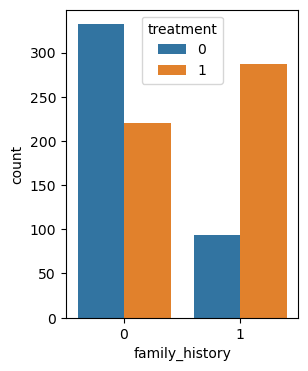

In [96]:
plt.figure(figsize=(3,4),dpi=100)
sns.countplot(data=df,x='family_history',hue='treatment')

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X=df.drop('treatment',axis=1)
y=df['treatment']

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [101]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
X_test_scaled

array([[-0.03916302, -0.37098607,  1.18352663, ...,  1.0827089 ,
        -0.14221222,  2.20972462],
       [-0.03916302,  2.69551902, -0.8449324 , ..., -0.09367864,
         1.04835932, -0.45254508],
       [-0.03916302, -0.37098607, -0.8449324 , ..., -1.27006619,
         1.04835932, -0.45254508],
       ...,
       [-0.03916302, -0.37098607, -0.8449324 , ...,  1.0827089 ,
        -1.33278376, -0.45254508],
       [-0.03916302, -0.37098607, -0.8449324 , ..., -1.27006619,
        -1.33278376, -0.45254508],
       [-0.03916302, -0.37098607, -0.8449324 , ..., -0.09367864,
        -1.33278376,  2.20972462]])

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
le=LogisticRegression(max_iter=200)
le.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=200)

In [105]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [106]:
y_predict = le.predict(X_test_scaled)

In [107]:
print("Accuracy Score:", accuracy_score(y_test, y_predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

Accuracy Score: 0.7428571428571429
Confusion Matrix:
 [[100  33]
 [ 39 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.74       133
           1       0.77      0.73      0.75       147

    accuracy                           0.74       280
   macro avg       0.74      0.74      0.74       280
weighted avg       0.74      0.74      0.74       280



Text(50.722222222222214, 0.5, 'Actual')

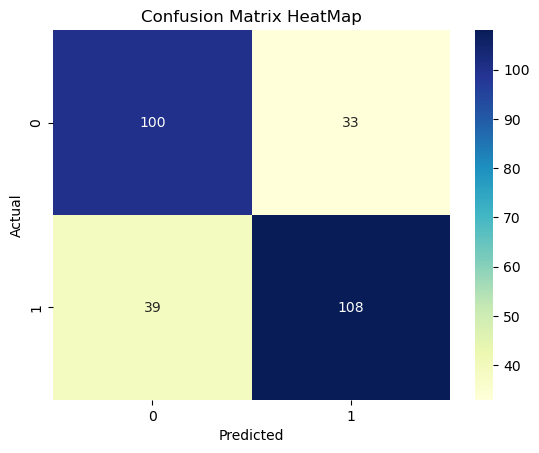

In [108]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix HeatMap')
plt.xlabel('Predicted')
plt.ylabel('Actual')